# <span style="color: red;">SanFrancisco & Dublin Bike Usage Analysis</span>  

## LIBRARIES

In [1]:
import pandas as pd #Pandas is used directly for data analysis
import numpy as np #Numpy is used for numerical calculations and fast operations on large data arrays

import matplotlib.pyplot as plt #matplotlib is the basic Python library used in data visualization
import seaborn as sns #seaborn is a python visualization library based on the matplotlib library

import scipy.stats as stats #scipy.stats contains optimized functions used in Data Science and other engineering fields and is an extension of Numpy

from sklearn.preprocessing import LabelEncoder #LabelEncoder is used in a process where categorical variables are transformed into a form suitable for machine learning algorithms so that they can be used in predictions. It helps to digitize data exactly
from sklearn.preprocessing import scale #Scale improves the performance of the dataset by appropriately adjusting the scales of different features
from sklearn.preprocessing import StandardScaler #StandardScaler is the process of rescaling the data set so that the mean of each attribute value is zero and the standard deviation is one
from sklearn import metrics #metrics is a quantitative (numerical values that can be counted, measured) measurement of data
from sklearn.metrics import confusion_matrix #confusion_matrix to be able to interpret the results of an established classification model
from sklearn.metrics import precision_score #precision_score is the success rate of positive class (1) predictions, that is, it shows how many of the predicted positive classes (classes predicted as 1) are actually positive
from sklearn.metrics import recall_score #recall_score shows how successfully positive situations are predicted
from sklearn.model_selection import train_test_split #train_test_split is the process of dividing the data set into training and test data
from sklearn.model_selection import KFold #KFold  is one of the methods of dividing the data set into pieces to evaluate classification models and train the model
from sklearn.model_selection import cross_val_score #cross_val_score is a cross-validation method
from sklearn.model_selection import GridSearchCV #GridSearchCV is the process of finding the most appropriate combination of hyperparameters according to the success metric determined for a machine learning algorithm
from sklearn.decomposition import PCA #PCA is a dimension reduction technique

#Machine learning algorithms libraries
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import json #Json library is used to handle json format
import requests #Requests provides access to web pages via HTTP. It is used in operations such as extracting data from web pages and communicating with APIs

import pprint #Provides better readability

import warnings #Warnings is used to ignore some warnings
warnings.filterwarnings("ignore")

C:\Users\batuc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


----------

## FUNCTION

In [2]:
#The functions we will use in the future have been defined
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize)
def median(array):
    median = np.median(array)
    return print("Median:", median)
def mean(array):
    mean = np.mean(array)
    return print("Mean:", mean)
def variance(array):
    variance = np.var(array)
    return print("Variance:", variance)

----------

## DATAFRAME

### San Francisco Data from API

In [3]:
#A get request was sent via the URL and the data text returned from the API was received
sf_BikeApiReq = requests.get("https://data.sfgov.org/resource/7jbp-yzp3.json").text
sf_BikeJson = json.loads(sf_BikeApiReq)
#Improved readability of Json data
pprint.pprint(sf_BikeJson)

[{'analysis_neighborhood': 'Western Addition',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '31',
  'has_kiosk': 'true',
  'objectid': '4',
  'region_id': '3',
  'shape': {'coordinates': [-122.434558868, 37.783812709], 'type': 'Point'},
  'station_id': '31',
  'station_id_domo': 'SF-G19',
  'station_latitude': '37.78381271',
  'station_longitude': '-122.43455887',
  'station_name': 'Raymond Kimbell Playground',
  'supervisor_district': '5'},
 {'analysis_neighborhood': 'Western Addition',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '27',
  'has_kiosk': 'true',
  'objectid': '27',
  'region_id': '3',
  'shape': {'coordinates': [-122.439445853, 37.782404602], 'type': 'Point'},
  'station_id': '29',
  'station_id_domo': 'SF-H18',
  'station_latitude': '37.7824046',
  'station_longitude': '-122.43944585',
  'station_name': "O'Farrell St at Divisadero St",
  'supervisor_

  'station_latitude': '37.7518194',
  'station_longitude': '-122.4266139',
  'station_name': '24th St at Chattanooga St',
  'supervisor_district': '8'},
 {'analysis_neighborhood': 'Noe Valley',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '19',
  'has_kiosk': 'true',
  'objectid': '119',
  'region_id': '3',
  'shape': {'coordinates': [-122.4339496, 37.750506], 'type': 'Point'},
  'station_id': '137',
  'station_id_domo': 'SF-R19',
  'station_latitude': '37.750506',
  'station_longitude': '-122.4339496',
  'station_name': 'Jersey St at Castro St',
  'supervisor_district': '8'},
 {'analysis_neighborhood': 'Noe Valley',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '15',
  'has_kiosk': 'true',
  'objectid': '124',
  'region_id': '3',
  'shape': {'coordinates': [-122.4268059, 37.7436839], 'type': 'Point'},
  'station_id': '145',
  'station_id_domo': 'SF-T20',
  'station_

  'station_latitude': '37.80025443',
  'station_longitude': '-122.42591947',
  'station_name': 'Greenwich St at Franklin St',
  'supervisor_district': '2'},
 {'analysis_neighborhood': 'Marina',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '0',
  'has_kiosk': 'false',
  'objectid': '444',
  'shape': {'coordinates': [-122.442702, 37.802949], 'type': 'Point'},
  'station_id': '539',
  'station_id_domo': 'SF-A18',
  'station_latitude': '37.802949',
  'station_longitude': '-122.442702',
  'station_name': 'North Point St at Divisadero St',
  'supervisor_district': '2'},
 {'analysis_neighborhood': 'Marina',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '19',
  'has_kiosk': 'true',
  'objectid': '452',
  'shape': {'coordinates': [-122.427457, 37.797249], 'type': 'Point'},
  'station_id': '544',
  'station_id_domo': 'SF-C21',
  'station_latitude': '37.797249',
  'station_long

  'station_id_domo': 'SF-A27',
  'station_latitude': '37.80477',
  'station_longitude': '-122.403234',
  'station_name': 'The Embarcadero at Sansome St',
  'supervisor_district': '3'},
 {'analysis_neighborhood': 'Financial District/South Beach',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '23',
  'has_kiosk': 'true',
  'objectid': '19',
  'region_id': '3',
  'shape': {'coordinates': [-122.3945855, 37.7963894], 'type': 'Point'},
  'station_id': '12',
  'station_id_domo': 'SF-D29',
  'station_latitude': '37.7963894',
  'station_longitude': '-122.3945855',
  'station_name': 'Pier 1/2 at The Embarcadero',
  'supervisor_district': '3'},
 {'analysis_neighborhood': 'Financial District/South Beach',
  'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '19',
  'has_kiosk': 'true',
  'objectid': '21',
  'region_id': '3',
  'shape': {'coordinates': [-122.400868982, 37.798572108], 'ty

  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '0',
  'has_kiosk': 'true',
  'objectid': '143',
  'region_id': '12',
  'shape': {'coordinates': [-122.2651002, 37.8262863], 'type': 'Point'},
  'station_id': '177',
  'station_id_domo': 'OK-G4',
  'station_latitude': '37.8262863',
  'station_longitude': '-122.2651002',
  'station_name': 'MacArthur Blvd at Telegraph Ave'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '24',
  'has_kiosk': 'true',
  'objectid': '146',
  'region_id': '12',
  'shape': {'coordinates': [-122.251900434, 37.844278754], 'type': 'Point'},
  'station_id': '171',
  'station_id_domo': 'OK-B4',
  'station_latitude': '37.84427875',
  'station_longitude': '-122.25190043',
  'station_name': 'Rockridge BART Station'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '27',
  'has_kiosk': 'true',
  'objectid': '153',
  'region_id': '12',
  'sha

  'station_longitude': '-122.255547',
  'station_name': '4th Ave at E 12th St (Temporary Location)'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '19',
  'has_kiosk': 'true',
  'objectid': '208',
  'region_id': '5',
  'shape': {'coordinates': [-121.8977018, 37.3302641], 'type': 'Point'},
  'station_id': '283',
  'station_id_domo': 'SJ-M8-2',
  'station_latitude': '37.3302641',
  'station_longitude': '-121.8977018',
  'station_name': 'Delmas Ave and San Fernando St'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '30',
  'has_kiosk': 'true',
  'objectid': '209',
  'region_id': '14',
  'shape': {'coordinates': [-122.2543374, 37.8693603], 'type': 'Point'},
  'station_id': '243',
  'station_id_domo': 'BK-D10',
  'station_latitude': '37.8693603',
  'station_longitude': '-122.2543374',
  'station_name': 'Bancroft Way at College Ave'},
 {'data_as_of': '2024-01-18T15:28:35.

  'has_kiosk': 'true',
  'objectid': '261',
  'region_id': '5',
  'shape': {'coordinates': [-121.899662018, 37.347592574], 'type': 'Point'},
  'station_id': '290',
  'station_id_domo': 'SJ-I9',
  'station_latitude': '37.34759257',
  'station_longitude': '-121.89966202',
  'station_name': 'George St at 1st St'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '23',
  'has_kiosk': 'true',
  'objectid': '262',
  'region_id': '5',
  'shape': {'coordinates': [-121.886995, 37.337391], 'type': 'Point'},
  'station_id': '309',
  'station_id_domo': 'SJ-M10-1',
  'station_latitude': '37.337391',
  'station_longitude': '-121.886995',
  'station_name': 'San Jose City Hall'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '11',
  'has_kiosk': 'true',
  'objectid': '263',
  'region_id': '5',
  'shape': {'coordinates': [-121.894902, 37.333988], 'type': 'Point'},
  'station_id': '314',


  'station_name': 'Sonora Ave at 1st St'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '27',
  'has_kiosk': 'true',
  'objectid': '328',
  'region_id': '5',
  'shape': {'coordinates': [-121.906834245, 37.360854155], 'type': 'Point'},
  'station_id': '395',
  'station_id_domo': 'SJ-F10',
  'station_latitude': '37.36085416',
  'station_longitude': '-121.90683424',
  'station_name': 'Kerley Dr at Rosemary St'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'dock_count': '23',
  'has_kiosk': 'true',
  'objectid': '332',
  'region_id': '5',
  'shape': {'coordinates': [-121.919478178, 37.338022313], 'type': 'Point'},
  'station_id': '393',
  'station_id_domo': 'SJ-I5',
  'station_latitude': '37.33802231',
  'station_longitude': '-121.91947818',
  'station_name': 'Asbury St at The Alameda'},
 {'data_as_of': '2024-01-18T15:28:35.000',
  'data_loaded_at': '2024-01-18T15:30:44.000',
  'doc

In [4]:
#Values transferred to data frame
sf_BikeJsonDF  = pd.DataFrame.from_dict(sf_BikeJson)
#pprint.pprint(sf_BikeJsonDF)
#sf_BikeJsonDF

In [5]:
#First 5 (default) lines viewed
sf_BikeJsonDF.head()

,objectid,station_id,station_name,station_id_domo,has_kiosk,dock_count,station_latitude,station_longitude,region_id,shape,supervisor_district,analysis_neighborhood,data_loaded_at,data_as_of
0,4,31,Raymond Kimbell Playground,SF-G19,true,31,37.78381271,-122.43455887,3,"{'type': 'Point', 'coordinates': [-122.4345588...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
1,27,29,O'Farrell St at Divisadero St,SF-H18,true,27,37.7824046,-122.43944585,3,"{'type': 'Point', 'coordinates': [-122.4394458...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
2,36,39,Scott St at Golden Gate Ave,SF-I19,true,27,37.778999400000004,-122.4368608,3,"{'type': 'Point', 'coordinates': [-122.4368608...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
3,41,54,Alamo Square (Steiner St at Fulton St),SF-J19,true,23,37.77754677,-122.43327409,3,"{'type': 'Point', 'coordinates': [-122.4332740...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
4,217,285,Webster St at O'Farrell St,SF-H20,true,27,37.78352084,-122.43115783,3,"{'type': 'Point', 'coordinates': [-122.4311578...",5,Western Addition,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000


In [6]:
#Total number of columns and rows were checked
sf_BikeJsonDF.shape

(472, 14)

In [7]:
#Last 5 (default) lines viewed
sf_BikeJsonDF.tail()

,objectid,station_id,station_name,station_id_domo,has_kiosk,dock_count,station_latitude,station_longitude,region_id,shape,supervisor_district,analysis_neighborhood,data_loaded_at,data_as_of
467,411,475,22nd St at William St,SJ-N14,true,15,37.34037874,-121.86402082,5,"{'type': 'Point', 'coordinates': [-121.8640208...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
468,417,495,St James St at 9th St,SJ-L11,true,19,37.34320849,-121.88438952,5,"{'type': 'Point', 'coordinates': [-121.8843895...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
469,419,494,Park Ave at Laurel Grove Ln,SJ-M6-2,true,19,37.32628232,-121.9049111,5,"{'type': 'Point', 'coordinates': [-121.9049111...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
470,961,546,13th St at Webster St,OK-L6-2,true,19,37.8026884,-122.26914637,NaN,"{'type': 'Point', 'coordinates': [-122.2691463...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000
471,349,421,23rd St at Taylor St,SJ-I14,true,19,37.36000139,-121.87877834,5,"{'type': 'Point', 'coordinates': [-121.8787783...",NaN,NaN,2024-01-18T15:30:44.000,2024-01-18T15:28:35.000


----------

### San Francisco Data from CSV

In [8]:
#The file to be processed is assigned to the variable
sf_BikeCsv052024 = r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco052024.csv"
sf_BikeCsv062024 = r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco062024.csv"
#----------
sf_BikeCsv052021 = r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco052021.csv"
sf_BikeCsv062021 = r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco062021.csv"
sf_BikeCsv052022 = r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco052022.csv"
sf_BikeCsv072022 = r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco072022.csv"
#Csv files read
sf_BikeCsv052024 = pd.read_csv(sf_BikeCsv052024)
sf_BikeCsv062024 = pd.read_csv(sf_BikeCsv062024)
#Dataframes created and merged with concat
sf_BikeDF = pd.concat([sf_BikeCsv052024, sf_BikeCsv062024])
#Index values have been reset
sf_BikeDF.reset_index(drop=True, inplace=True)
#pprint.pprint(sf_BikeDF)
#sf_BikeDF

In [9]:
#Shape function was used to control the merge
sf_BikeDF.shape

(599566, 13)

In [10]:
#First 5 (default) lines viewed
sf_BikeDF.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0B7EA0C5A6AA0315,electric_bike,2024-05-20 16:55:06,2024-05-20 17:07:43,Civic Center/UN Plaza BART Station (Market St ...,SF-I25,24th St BART Station,SF-Q23-3,37.781348,-122.411666,37.751992,-122.418980,member
1,326D4F9B4FAB456B,electric_bike,2024-05-29 16:03:54,2024-05-29 16:21:09,Irving St at 17th Ave,SF-M9-2,7th Ave at Irving St,SF-M12,37.763728,-122.475364,37.763434,-122.464063,casual
2,9EA3488CA2AF21B2,classic_bike,2024-05-20 19:05:58,2024-05-20 19:12:33,Pierce St at Haight St,SF-K20,Mission Dolores Park,SF-O21,37.771793,-122.433708,37.761420,-122.426435,casual
3,6C61A3DAA31741B7,electric_bike,2024-05-20 22:38:51,2024-05-20 22:44:58,Grove St at Divisadero,SF-J18,Mission Dolores Park,SF-O21,37.775961,-122.437783,37.761420,-122.426435,casual
4,2F489589E1B4D7CF,electric_bike,2024-05-23 14:44:14,2024-05-23 14:49:53,Koshland Park,SF-K21,Mission Dolores Park,SF-O21,37.773488,-122.427221,37.761420,-122.426435,casual


In [11]:
#The names of the columns were learned
sf_BikeDF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [12]:
#Since there is a lot of data, it was decided to use 50k data. Since similar data came one after another, the data was mixed using the sample method and then taken
sf_BikeDF = sf_BikeDF.sample(n=50000)

In [13]:
#To provide clearer data, division was made in the started_at & ended_at columns
sf_BikeDF["started_at"] = pd.to_datetime(sf_BikeDF["started_at"])
sf_BikeDF["started_date"] = sf_BikeDF['started_at'].dt.date
sf_BikeDF["started_time"] = sf_BikeDF['started_at'].dt.time

sf_BikeDF["ended_at"] = pd.to_datetime(sf_BikeDF["ended_at"])
sf_BikeDF["ended_date"] = sf_BikeDF['ended_at'].dt.date
sf_BikeDF["ended_time"] = sf_BikeDF['ended_at'].dt.time

In [14]:
#Columns that will not be used are deleted
sf_BikeDF = sf_BikeDF.drop(columns=["start_lat", "start_lng", "end_lat", "end_lng", "started_at", "ended_at"])
sf_BikeDF.columns

Index(['ride_id', 'rideable_type', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'member_casual', 'started_date',
       'started_time', 'ended_date', 'ended_time'],
      dtype='object')

In [15]:
#The names of some columns have been changed
newNamesSf =  {"ride_id": "transaction_id", "rideable_type": "bike_type"}
sf_BikeDF.rename(columns=newNamesSf, inplace=True)

In [16]:
#Total number of columns and rows were checked again
sf_BikeDF.shape

(50000, 11)

In [17]:
#Data types of columns were learned
sf_BikeDF.dtypes

transaction_id        object
bike_type             object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
member_casual         object
started_date          object
started_time          object
ended_date            object
ended_time            object
dtype: object

In [18]:
#Last 5 (default) lines viewed
sf_BikeDF.tail()

,transaction_id,bike_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,started_date,started_time,ended_date,ended_time
41441,C08B1A695FB867A0,electric_bike,Larkin St at California St,SF-F23-3,The Embarcadero at Steuart St,SF-F30-1,member,2024-05-22,09:18:18,2024-05-22,09:26:17
218221,A002289F1274DB4D,classic_bike,Valencia St at 22nd St,SF-Q22-1,Valencia St at 21st St,SF-P22,member,2024-05-22,14:53:44,2024-05-22,14:54:43
598289,613604B075657E03,electric_bike,Laguna St at Hayes St,SF-J21,Pierce St at Haight St,SF-K20,member,2024-06-21,16:54:23.252000,2024-06-21,17:02:28.317000
298300,DC5A90B357E5AF5B,electric_bike,1st St at Folsom St,SF-G29-2,Embarcadero BART,SF-E29-3,member,2024-06-13,07:36:35.644000,2024-06-13,07:39:02.359000
261364,7066540C7C047225,electric_bike,Fillmore St at Jefferson St,SF-A19,North Point St at Powell St,SF-A25,casual,2024-05-15,15:30:48,2024-05-15,15:45:49


In [19]:
#The number of elements in the columns was learned
sf_BikeDF.count()

transaction_id        50000
bike_type             50000
start_station_name    47191
start_station_id      47191
end_station_name      46639
end_station_id        46623
member_casual         50000
started_date          50000
started_time          50000
ended_date            50000
ended_time            50000
dtype: int64

In [20]:
#More detailed information was received about the columns
sf_BikeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 569241 to 261364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   transaction_id      50000 non-null  object
 1   bike_type           50000 non-null  object
 2   start_station_name  47191 non-null  object
 3   start_station_id    47191 non-null  object
 4   end_station_name    46639 non-null  object
 5   end_station_id      46623 non-null  object
 6   member_casual       50000 non-null  object
 7   started_date        50000 non-null  object
 8   started_time        50000 non-null  object
 9   ended_date          50000 non-null  object
 10  ended_time          50000 non-null  object
dtypes: object(11)
memory usage: 4.6+ MB


In [21]:
#Rows containing null values were detected
sf_BikeDF.isnull().sum()

transaction_id           0
bike_type                0
start_station_name    2809
start_station_id      2809
end_station_name      3361
end_station_id        3377
member_casual            0
started_date             0
started_time             0
ended_date               0
ended_time               0
dtype: int64

In [22]:
#Rows with NaN values were ignored
#sf_BikeDF[sf_BikeDF["start_station_name", "start_station_id ", "end_station_name", "end_station_id "].notna()]
#Rows with NaN values were deleted
sf_BikeDF.dropna(inplace=True) 

In [23]:
#It was checked again whether the Nan values were present or not
sf_BikeDF.isnull().sum()

transaction_id        0
bike_type             0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
started_date          0
started_time          0
ended_date            0
ended_time            0
dtype: int64

In [24]:
#Describe function was used
print(sf_BikeDF['transaction_id'].describe())
print("----------")
print(sf_BikeDF['bike_type'].describe())
print("----------")
print(sf_BikeDF['start_station_name'].describe())
print("----------")
print(sf_BikeDF['start_station_id'].describe())
print("----------")
print(sf_BikeDF['end_station_name'].describe())
print("----------")
print(sf_BikeDF['end_station_id'].describe())
print("----------")
print(sf_BikeDF['member_casual'].describe())
print("----------")
print(sf_BikeDF['started_date'].describe())
print("----------")
print(sf_BikeDF['started_time'].describe())
print("----------")
print(sf_BikeDF['ended_date'].describe())
print("----------")
print(sf_BikeDF['ended_time'].describe())

count                44823
unique               44823
top       153112934572B1F5
freq                     1
Name: transaction_id, dtype: object
----------
count             44823
unique                2
top       electric_bike
freq              34411
Name: bike_type, dtype: object
----------
count                       44823
unique                        600
top       Market St at Steuart St
freq                          537
Name: start_station_name, dtype: object
----------
count        44823
unique         552
top       SF-E29-2
freq           537
Name: start_station_id, dtype: object
----------
count                       44823
unique                        597
top       Market St at Steuart St
freq                          600
Name: end_station_name, dtype: object
----------
count        44823
unique         551
top       SF-E29-2
freq           600
Name: end_station_id, dtype: object
----------
count      44823
unique         2
top       member
freq       32787
Name: member_casual

In [25]:
#Unique function was used
print(sf_BikeDF['transaction_id'].unique())
print("----------")
print(sf_BikeDF['bike_type'].unique())
print("----------")
print(sf_BikeDF['start_station_name'].unique())
print("----------")
print(sf_BikeDF['start_station_id'].unique())
print("----------")
print(sf_BikeDF['end_station_name'].unique())
print("----------")
print(sf_BikeDF['end_station_id'].unique())
print("----------")
print(sf_BikeDF['member_casual'].unique())
print("----------")
print(sf_BikeDF['started_date'].unique())
print("----------")
print(sf_BikeDF['started_time'].unique())
print("----------")
print(sf_BikeDF['ended_date'].unique())
print("----------")
print(sf_BikeDF['ended_time'].unique())

['153112934572B1F5' 'AD919D484212414A' '6FB2D2D46D9DA6B1' ...
 '613604B075657E03' 'DC5A90B357E5AF5B' '7066540C7C047225']
----------
['electric_bike' 'classic_bike']
----------
['Steiner St at California St' 'Genoa St at 55th St' 'Polk St at Post St'
 'Laguna St at Hayes St' 'The Embarcadero at Sansome St'
 'Townsend St at 5th St' 'Webster St at Union St'
 'Market St at Steuart St' 'Folsom St at 19th St'
 '48th Ave at Cabrillo St' 'Harrison St at 20th St' '11th St at Natoma St'
 'Anza St at 19th Ave' '5th St at Howard St' 'Divisadero St at Lombard St'
 'North Point St at Powell St' 'San Francisco Ferry Building'
 'Howard St at 8th St' 'Union Square' 'Market St at 45th St'
 'Folsom St at 5th St' 'Front St at California St'
 'San Francisco Caltrain East' 'Dolores St at 22nd St' 'West Oakland BART'
 '22nd St Caltrain Station' '19th St at Florida St'
 'Addison St at Fourth St' 'Montgomery St at Pacific Ave'
 'Folsom St at 7th St' '4th St at Gene Friend Way'
 '62nd St at Claremont Ave' 'Crui

----------

### Dublin Data from CSV

In [26]:
#The file to be processed is assigned to the variable
dub_BikeCsv052024 = r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_052024.csv"
dub_BikeCsv062024 = r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_062024.csv"
#----------
dub_BikeCsv052021 = r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_052021.csv"
dub_BikeCsv062021 = r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_062021.csv"
dub_BikeCsv052022 = r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_052022.csv"
dub_BikeCsv072022 = r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_072022.csv"
#Csv files read
dub_BikeCsv052024 = pd.read_csv(dub_BikeCsv052024)
dub_BikeCsv062024 = pd.read_csv(dub_BikeCsv062024)
#Dataframes created and merged with concat
dub_BikeDF = pd.concat([dub_BikeCsv052024, dub_BikeCsv062024])
#Index values have been reset
dub_BikeDF.reset_index(drop=True, inplace=True)
#pprint.pprint(dub_BikeDF)
#dub_BikeDF

In [27]:
#First 5 (default) lines viewed
dub_BikeDF.head()

,system_id,ts_start,ts_end,bike_id,is_reserved,is_disabled,lat,lon,vehicle_type_id,station_id,current_fuel_percent,current_range_meters,elapsed,ct_records,dt_start,dt_end
0,mobymoby_dublin,1715706053,1715731166,YLE:Vehicle:MTAwMDYxOTA3MDo6MTcxNTUxMDE0OA==,False,False,53.325836,-6.276747,YLE:VehicleType:BIKE,2.081611e+09,0,0,25113,415,2024-05-14 17:00:53,2024-05-14 23:59:26
1,mobymoby_dublin,1715706053,1715731166,YLE:Vehicle:MTAwMDYxOTIzMTo6MTcxMjk0NzgyMQ==,False,False,53.305430,-6.302597,YLE:VehicleType:BIKE,1.245628e+08,0,0,25113,415,2024-05-14 17:00:53,2024-05-14 23:59:26
2,mobymoby_dublin,1715706053,1715706235,YLE:Vehicle:MTEwMjAwNDEwNDo6MTcxNTcwNjA0Mw==,False,False,53.404915,-6.172723,YLE:VehicleType:BIKE,1.245628e+08,0,0,182,4,2024-05-14 17:00:53,2024-05-14 17:03:55
3,mobymoby_dublin,1715706053,1715731166,YLE:Vehicle:Mjk5OTIyMTEwNTU6OjE3MDk4MDEyNjM=,False,False,53.376892,-6.269821,YLE:VehicleType:E_BIKE,NaN,0,78,25113,415,2024-05-14 17:00:53,2024-05-14 23:59:26
4,mobymoby_dublin,1715706053,1715731166,YLE:Vehicle:Mjk5OTIyMTExNDU6OjE3MTQ5NjIyNzk=,False,False,53.276830,-6.103433,YLE:VehicleType:E_BIKE,1.245628e+08,0,0,25113,415,2024-05-14 17:00:53,2024-05-14 23:59:26


In [28]:
#Total number of columns and rows were checked
dub_BikeDF.shape

(2592113, 16)

In [29]:
#Since there is a lot of data, it was decided to use 50k data. Since similar data came one after another, the data was mixed using the sample method and then taken
dub_BikeDF = dub_BikeDF.sample(n=50000)

In [30]:
#To provide clearer data, division was made in the dt_start & dt_end columns
dub_BikeDF["dt_start"] = pd.to_datetime(dub_BikeDF["dt_start"])
dub_BikeDF["started_date"] = dub_BikeDF['dt_start'].dt.date
dub_BikeDF["started_time"] = dub_BikeDF['dt_start'].dt.time

dub_BikeDF["dt_end"] = pd.to_datetime(dub_BikeDF["dt_end"])
dub_BikeDF["ended_date"] = dub_BikeDF['dt_end'].dt.date
dub_BikeDF["ended_time"] = dub_BikeDF['dt_end'].dt.time

In [31]:
#Columns that will not be used are deleted
dub_BikeDF = dub_BikeDF.drop(columns=["system_id", "is_reserved", "is_disabled", "lat", "lon", "current_fuel_percent", "ct_records", "dt_start", "dt_end"])
dub_BikeDF.columns

Index(['ts_start', 'ts_end', 'bike_id', 'vehicle_type_id', 'station_id',
       'current_range_meters', 'elapsed', 'started_date', 'started_time',
       'ended_date', 'ended_time'],
      dtype='object')

In [32]:
#The names of some columns have been changed
newNamesDub =  {"bike_id": "transaction_id", "vehicle_type_id": "bike_type"}
dub_BikeDF.rename(columns=newNamesDub, inplace=True)

In [33]:
dub_BikeDF['bike_type'] = dub_BikeDF['bike_type'].str.replace('YLE:VehicleType:', '')
dub_BikeDF['transaction_id'] = dub_BikeDF['transaction_id'].str.replace('YLE:Vehicle:', '')
dub_BikeDF['transaction_id'] = dub_BikeDF['transaction_id'].str[:-2]

In [34]:
#Total number of columns and rows were checked again
dub_BikeDF.shape

(50000, 11)

In [35]:
#Data types of columns were learned
dub_BikeDF.dtypes

ts_start                  int64
ts_end                    int64
transaction_id           object
bike_type                object
station_id              float64
current_range_meters      int64
elapsed                   int64
started_date             object
started_time             object
ended_date               object
ended_time               object
dtype: object

In [36]:
#Last 5 (default) lines viewed
dub_BikeDF.tail()

,ts_start,ts_end,transaction_id,bike_type,station_id,current_range_meters,elapsed,started_date,started_time,ended_date,ended_time
689695,1716436131,1716436313,NDAwMjAyMTI5MDo6MTcxNjQzNjA4MQ,BIKE,124562803.0,0,182,2024-05-23,03:48:51,2024-05-23,03:51:53
1106352,1716866370,1716866612,NDAwMjAyMTQ1ODo6MTcxNjg2NjM2MA,BIKE,124562803.0,0,242,2024-05-28,03:19:30,2024-05-28,03:23:32
2180930,1718157613,1718157794,NDAwMjAyMTQxNjo6MTcxODE1NzU1NQ,BIKE,124562803.0,0,181,2024-06-12,02:00:13,2024-06-12,02:03:14
2175120,1718151443,1718151624,NDAwMjAyMTEwNzo6MTcxODE1MTQzNQ,BIKE,124562803.0,0,181,2024-06-12,00:17:23,2024-06-12,00:20:24
1372971,1717165810,1717165992,NDAwMjAyMTQzODo6MTcxNzE2NTc4Mw,BIKE,124562803.0,0,182,2024-05-31,14:30:10,2024-05-31,14:33:12


In [37]:
#The number of elements in the columns was learned
dub_BikeDF.count()

ts_start                50000
ts_end                  50000
transaction_id          50000
bike_type               50000
station_id              49878
current_range_meters    50000
elapsed                 50000
started_date            50000
started_time            50000
ended_date              50000
ended_time              50000
dtype: int64

In [38]:
#More detailed information was received about the columns
dub_BikeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1459631 to 1372971
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ts_start              50000 non-null  int64  
 1   ts_end                50000 non-null  int64  
 2   transaction_id        50000 non-null  object 
 3   bike_type             50000 non-null  object 
 4   station_id            49878 non-null  float64
 5   current_range_meters  50000 non-null  int64  
 6   elapsed               50000 non-null  int64  
 7   started_date          50000 non-null  object 
 8   started_time          50000 non-null  object 
 9   ended_date            50000 non-null  object 
 10  ended_time            50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.6+ MB


In [39]:
#Rows containing null values were detected
dub_BikeDF.isnull().sum()

ts_start                  0
ts_end                    0
transaction_id            0
bike_type                 0
station_id              122
current_range_meters      0
elapsed                   0
started_date              0
started_time              0
ended_date                0
ended_time                0
dtype: int64

In [40]:
#Rows with NaN values were ignored
#dub_BikeDF[dub_BikeDF["station_id"].notna()]
#Rows with #NaN values were deleted
dub_BikeDF.dropna(inplace=True) 

In [41]:
#It was checked again whether the Nan values were present or not
dub_BikeDF.isnull().sum()

ts_start                0
ts_end                  0
transaction_id          0
bike_type               0
station_id              0
current_range_meters    0
elapsed                 0
started_date            0
started_time            0
ended_date              0
ended_time              0
dtype: int64

In [42]:
#Describe function was used
print(dub_BikeDF['ts_start'].describe())
print("----------")
print(dub_BikeDF['ts_end'].describe())
print("----------")
print(dub_BikeDF['transaction_id'].describe())
print("----------")
print(dub_BikeDF['bike_type'].describe())
print("----------")
print(dub_BikeDF['station_id'].describe())
print("----------")
print(dub_BikeDF['current_range_meters'].describe())
print("----------")
print(dub_BikeDF['elapsed'].describe())
print("----------")
print(dub_BikeDF['started_date'].describe())
print("----------")
print(dub_BikeDF['started_time'].describe())
print("----------")
print(dub_BikeDF['ended_date'].describe())
print("----------")
print(dub_BikeDF['ended_time'].describe())

count    4.987800e+04
mean     1.717128e+09
std      8.480219e+05
min      1.715706e+09
25%      1.716392e+09
50%      1.717075e+09
75%      1.717895e+09
max      1.718614e+09
Name: ts_start, dtype: float64
----------
count    4.987800e+04
mean     1.717128e+09
std      8.480331e+05
min      1.715706e+09
25%      1.716392e+09
50%      1.717075e+09
75%      1.717895e+09
max      1.718614e+09
Name: ts_end, dtype: float64
----------
count                              49878
unique                             49871
top       NDAwMjAyMTE4MDo6MTcxMDkyMjE4NQ
freq                                   2
Name: transaction_id, dtype: object
----------
count     49878
unique        2
top        BIKE
freq      48853
Name: bike_type, dtype: object
----------
count    4.987800e+04
mean     3.012803e+08
std      5.177134e+08
min      1.245628e+08
25%      1.245628e+08
50%      1.245628e+08
75%      1.245628e+08
max      2.081611e+09
Name: station_id, dtype: float64
----------
count    49878.000000
mean   

In [43]:
#Unique function was used
print(dub_BikeDF['ts_start'].unique())
print("----------")
print(dub_BikeDF['ts_end'].unique())
print("----------")
print(dub_BikeDF['transaction_id'].unique())
print("----------")
print(dub_BikeDF['bike_type'].unique())
print("----------")
print(dub_BikeDF['station_id'].unique())
print("----------")
print(dub_BikeDF['current_range_meters'].unique())
print("----------")
print(dub_BikeDF['elapsed'].unique())
print("----------")
print(dub_BikeDF['started_date'].unique())
print("----------")
print(dub_BikeDF['started_time'].unique())
print("----------")
print(dub_BikeDF['ended_date'].unique())
print("----------")
print(dub_BikeDF['ended_time'].unique())

[1717263946 1715734673 1717262615 ... 1718432947 1716436131 1716866370]
----------
[1717264127 1715734854 1717262615 ... 1716427305 1718433129 1716436313]
----------
['NDAwMjAyMTYwMzo6MTcxNzI2MzkwNQ' 'NDAwMjAyMTYwMzo6MTcxNTczNDYyNg'
 'NDAwMjAyMTE3Mjo6MTcxNzI2MjYwMw' ... 'NDAwMjAyMTQxNjo6MTcxODE1NzU1NQ'
 'NDAwMjAyMTEwNzo6MTcxODE1MTQzNQ' 'NDAwMjAyMTQzODo6MTcxNzE2NTc4Mw']
----------
['BIKE' 'E_BIKE']
----------
[1.24562803e+08 2.08161061e+09 1.84478061e+09 3.19789670e+08
 6.08222443e+08 7.75118352e+08 1.62780802e+09 1.49347641e+09
 1.53723799e+09 1.45941138e+09 2.07309710e+09]
----------
[ 0 61 44 51 14 39 74 57 77 10 63 46 12  6 70 55 67 78  3 64 66 18 29 49
 33 65 53 68 75 35  5  4 76  7 60 71 62 24  2 42 73 45 59 47 48 27 15  8
 19 69 54 72 56  9 37 34 25  1 28 41 38 21 16 26 20 40 13 17 43 31 36 50
 30 52 22 11 32 58]
----------
[  181     0   182   216    60   122   121   210   211   212    61     2
   185   152   205   242   120   786   214   215   846   213   847   877
   151   850

----------

### Visualization and Machine Learning

In [44]:
sf_NumberOfBike = sf_BikeDF['bike_type'].value_counts().reset_index()
sf_NumberOfBike.columns = ['Type', 'Number']
sf_NumberOfBike['Type'] = sf_NumberOfBike['Type'].replace('electric_bike', 'E_Bike')
sf_NumberOfBike['Type'] = sf_NumberOfBike['Type'].replace('classic_bike', 'Classic_Bike')

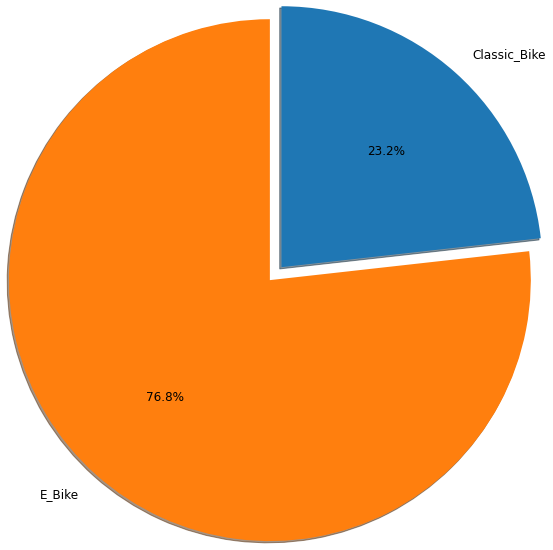

In [45]:
#Pie visualization was done for San Francisco data
fig, ax = plt.subplots()
piece = (0, 0.2) 
colors = ["#ff7f0e", "#1f77b4"]
ax.pie(x="Number", labels="Type", autopct="%1.1f%%", data=sf_NumberOfBike, explode=piece, 
       shadow={"ox": -0.01, "edgecolor": "blue", "shade": 1}, startangle=90,  textprops={"size": "large"}, radius=3, colors=colors)
plt.show()

In [46]:
#Necessary adjustments were made to make the graphics look smoother
dub_NumberOfBike = dub_BikeDF['bike_type'].value_counts().reset_index()
dub_NumberOfBike.columns = ['Type', 'Number']
dub_NumberOfBike['Type'] = dub_NumberOfBike['Type'].replace('BIKE', 'Classic_Bike')
dub_NumberOfBike['Type'] = dub_NumberOfBike['Type'].replace('E_BIKE', 'E_Bike')

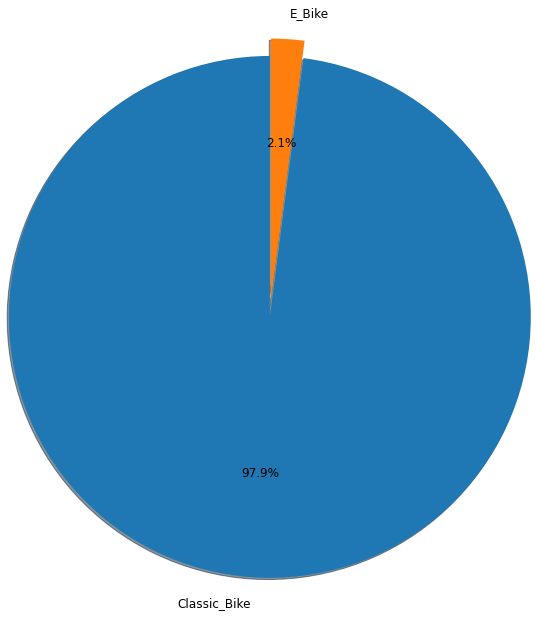

In [47]:
#Pie visualization was done for Dublin data
fig, ax = plt.subplots()
piece = (0, 0.2)  
colors = ["#1f77b4", "#ff7f0e"]
ax.pie(x="Number", labels="Type", autopct="%1.1f%%", data=dub_NumberOfBike, explode=piece, 
       shadow={"ox": -0.01, "edgecolor": "blue", "shade": 1}, startangle=90,  textprops={"size": "large"}, radius=3, colors=colors)
plt.show()

In [48]:
dictNumberOfBikeType = {"Type": ["San Francisco Bike", "San Francisco E-Bike", "Dublin Bike", "Dublin E-Bike"], 
                           "Value": [sf_NumberOfBike["Number"][0], sf_NumberOfBike["Number"][1], dub_NumberOfBike["Number"][0], dub_NumberOfBike["Number"][1]]}
numberOfBikeTypeDF = pd.DataFrame(dictNumberOfBikeType)

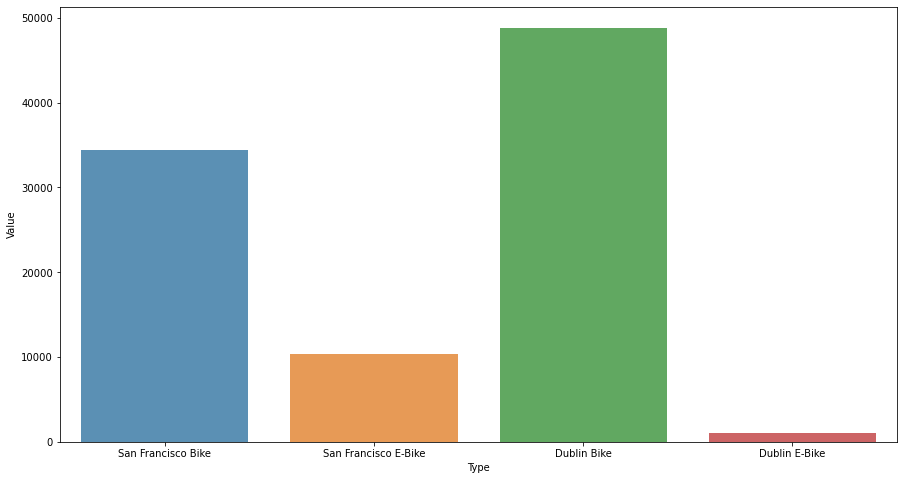

In [49]:
#Barplot visualization was done
fig = plt.figure(figsize=(15,8))
sns.barplot(x="Type", y="Value", data=numberOfBikeTypeDF, alpha=0.8);

----------

In [50]:
#Date and time columns converted to str format
sf_BikeDF['started_date'] = sf_BikeDF['started_date'].astype(str)
sf_BikeDF['started_time'] = sf_BikeDF['started_time'].astype(str)
sf_BikeDF['ended_date'] = sf_BikeDF['ended_date'].astype(str)
sf_BikeDF['ended_time'] = sf_BikeDF['ended_time'].astype(str)

#Converted to datetime format after combining date and time columns
sf_BikeDF['started_at'] = pd.to_datetime(sf_BikeDF['started_date'] + ' ' + sf_BikeDF['started_time'])
sf_BikeDF['ended_at'] = pd.to_datetime(sf_BikeDF['ended_date'] + ' ' + sf_BikeDF['ended_time'])

#Calculated time interval
sf_BikeDF['elapsed'] = sf_BikeDF['ended_at'] - sf_BikeDF['started_at']

#Set the time interval in seconds
sf_BikeDF['elapsed'] = sf_BikeDF['elapsed'].dt.total_seconds()

sf_BikeDF = sf_BikeDF[['transaction_id', 'bike_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual', 'started_at', 'ended_at', 'elapsed']]

In [51]:
#When the update was made, the summation process was performed using the uniqe method to avoid repeating values. The reason for applying uniqe to seconds is to minimize the margin of error
sf_elapsedSum = sf_BikeDF['elapsed'].unique().sum()

sf_bikeSec = int(sf_elapsedSum)
sf_bikeMin = int(sf_elapsedSum/60)
sf_bikeHour = int(sf_bikeMin/60)

In [52]:
#When the update was made, the summation process was performed using the uniqe method to avoid repeating values. The reason for applying uniqe to seconds is to minimize the margin of error
dub_elapsedSum = dub_BikeDF['elapsed'].unique().sum()

dub_bikeSec = int(dub_elapsedSum)
dub_bikeMin = int(dub_elapsedSum/60)
dub_bikeHour = int(dub_bikeMin/60)

In [53]:
#A new dataframe was created for the operations to be performed
timeData = {
    'Time': ["Second", "Minute", "Hour"],
    'San Francisco': [sf_bikeSec, sf_bikeMin, sf_bikeHour],
    'Dublin': [dub_bikeSec, dub_bikeMin, dub_bikeHour]
}
timeDF = pd.DataFrame(timeData)
#Data listed in dataframe
timeDF.style.background_gradient(axis=None, cmap="Blues")

,Time,San Francisco,Dublin
0,Second,22761810,1885070
1,Minute,379363,31417
2,Hour,6322,523


----------

In [54]:
#File paths
filePaths = {
    "sf_BikeCsv052021": r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco052021.csv",
    "sf_BikeCsv062021": r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco062021.csv",
    "sf_BikeCsv052022": r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco052022.csv",
    "sf_BikeCsv072022": r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco072022.csv",
    "sf_BikeCsv052024": r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco052024.csv",
    "sf_BikeCsv062024": r"C:\Users\batuc\Desktop\firstSeasonProject\sanFranciscoData\sanFrancisco062024.csv"
}

#Read CSV files and assign them to variables
rowCounts = {}

for name, filePath in filePaths.items():
    newDF = pd.read_csv(filePath)
    rowCounts[name] = newDF.shape[0]

#Row numbers are assigned to variables
sf_BikeCsv052021Rows = rowCounts["sf_BikeCsv052021"]
sf_BikeCsv062021Rows = rowCounts["sf_BikeCsv062021"]
sf_BikeCsv052022Rows = rowCounts["sf_BikeCsv052022"]
sf_BikeCsv072022Rows = rowCounts["sf_BikeCsv072022"]
sf_BikeCsv052024Rows = rowCounts["sf_BikeCsv052024"]
sf_BikeCsv062024Rows = rowCounts["sf_BikeCsv062024"]

In [55]:
#File paths
file_paths = {
    "dub_BikeCsv052021": r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_052021.csv",
    "dub_BikeCsv062021": r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_062021.csv",
    "dub_BikeCsv052022": r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_052022.csv",
    "dub_BikeCsv072022": r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_072022.csv",
    "dub_BikeCsv052024": r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_052024.csv",
    "dub_BikeCsv062024": r"C:\Users\batuc\Desktop\firstSeasonProject\dublinData\dublin_062024.csv"
}

#Read CSV files and assign them to variables
row_counts = {}

for name, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    row_counts[name] = df.shape[0]

#Row numbers are assigned to variables
dub_BikeCsv052021Rows = row_counts["dub_BikeCsv052021"]
dub_BikeCsv062021Rows = row_counts["dub_BikeCsv062021"]
dub_BikeCsv052022Rows = row_counts["dub_BikeCsv052022"]
dub_BikeCsv072022Rows = row_counts["dub_BikeCsv072022"]
dub_BikeCsv052024Rows = row_counts["dub_BikeCsv052024"]
dub_BikeCsv062024Rows = row_counts["dub_BikeCsv062024"]


In [56]:
dictMonthYearData = {"Location": ["San Francisco", "Dublin", "San Francisco", "Dublin", "San Francisco", "Dublin", "San Francisco", "Dublin", "San Francisco", "Dublin", "San Francisco", "Dublin"], 
                            "Month": ["May 2021", "May 2021", "June 2021", "June 2021", "May 2022", "May 2022", "July 2022", "July 2022", "May 2024", "May 2024", "June 2024", "June 2024"], 
                            "Value": [sf_BikeCsv052021Rows, dub_BikeCsv052021Rows, sf_BikeCsv062021Rows, dub_BikeCsv062021Rows, sf_BikeCsv052022Rows, dub_BikeCsv052022Rows, sf_BikeCsv072022Rows, dub_BikeCsv072022Rows, sf_BikeCsv052024Rows, dub_BikeCsv052024Rows, sf_BikeCsv062024Rows, dub_BikeCsv062024Rows]}
#Data listed in dataframe
monthYearData = pd.DataFrame(dictMonthYearData)
monthYearData[['Month', 'Year']] = monthYearData['Month'].str.split(' ', expand=True)
monthYearData['MonthYear'] = monthYearData['Month'] + ' ' + monthYearData['Year'].astype(str)
monthYearData.style.background_gradient(axis=0, gmap=monthYearData["Value"], cmap="RdYlBu")

,Location,Month,Value,Year,MonthYear
0,San Francisco,May,169642,2021,May 2021
1,Dublin,May,81349,2021,May 2021
2,San Francisco,June,198493,2021,June 2021
3,Dublin,June,90023,2021,June 2021
4,San Francisco,May,232953,2022,May 2022
5,Dublin,May,22471,2022,May 2022
6,San Francisco,July,242102,2022,July 2022
7,Dublin,July,86923,2022,July 2022
8,San Francisco,May,296466,2024,May 2024
9,Dublin,May,1403543,2024,May 2024


In [57]:
dictMonthYearData2 = {"MonthYear": ["May 2021", "June 2021", "May 2022", "July 2022", "May 2024", "June 2024"], 
                          "SanFrancisco": [sf_BikeCsv052021Rows, sf_BikeCsv062021Rows, sf_BikeCsv052022Rows, sf_BikeCsv072022Rows, sf_BikeCsv052024Rows, sf_BikeCsv062024Rows],            
                          "Dublin": [dub_BikeCsv052021Rows, dub_BikeCsv062021Rows, dub_BikeCsv052022Rows, dub_BikeCsv072022Rows, dub_BikeCsv052024Rows, dub_BikeCsv062024Rows]}
#Data listed in dataframe
monthYearData2 = pd.DataFrame(dictMonthYearData2)

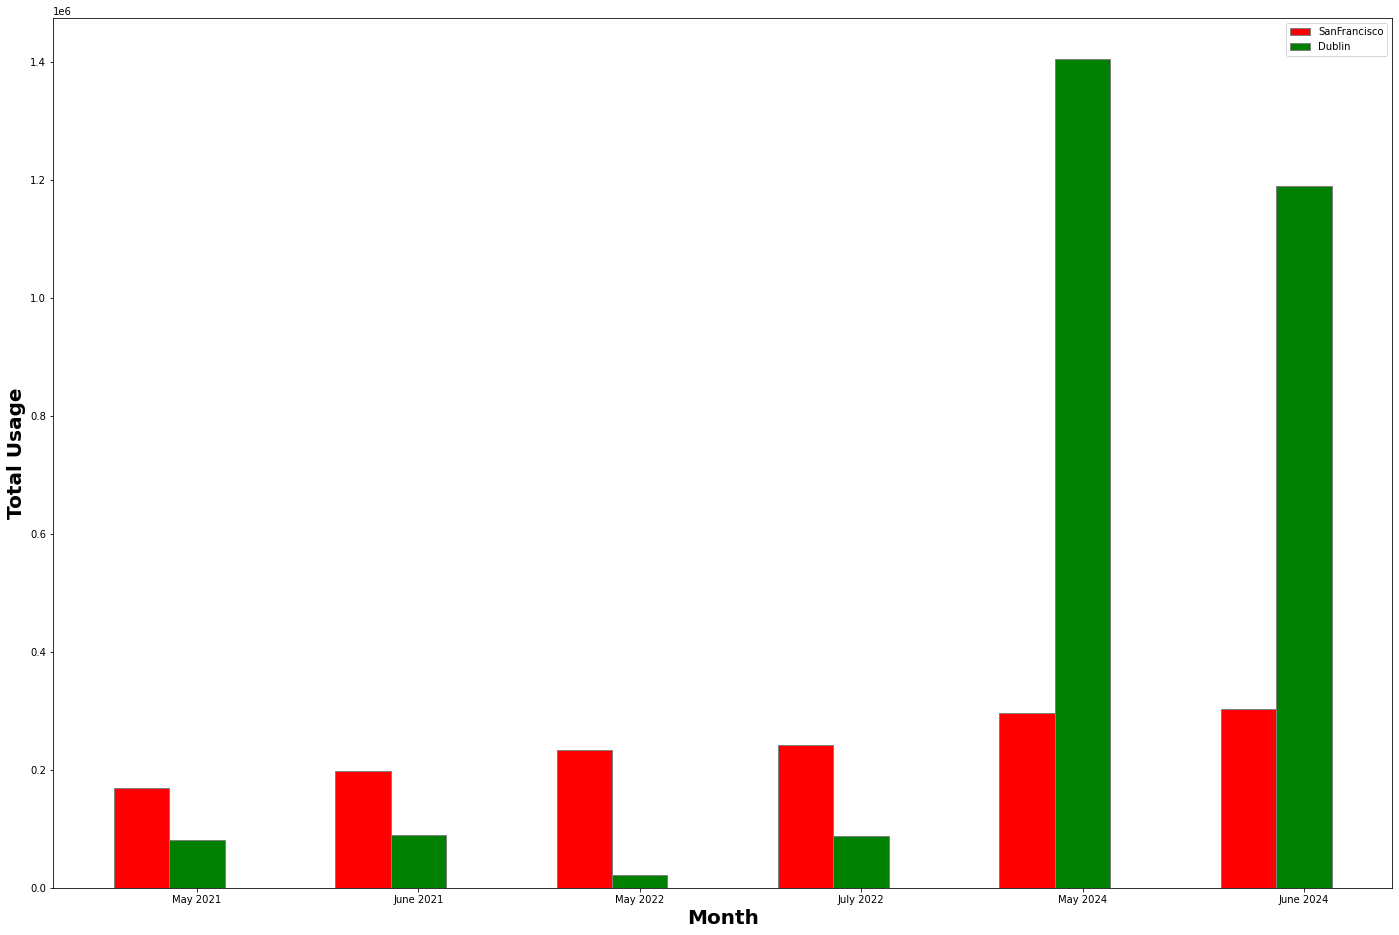

In [58]:
#Adjusted the width of the bar
barWidth = 0.25
fig = plt.subplots(figsize =(24, 16)) 
#Adjusted the position of the bar on the X axis
br1 = np.arange(len(monthYearData2['SanFrancisco'])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
#Columns and colors are determined
plt.bar(br1, monthYearData2['SanFrancisco'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='SanFrancisco') 
plt.bar(br2, monthYearData2['Dublin'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='Dublin') 
#Xticks are added
plt.xlabel('Month', fontweight ='bold', fontsize = 20) 
plt.ylabel('Total Usage', fontweight ='bold', fontsize = 20) 
plt.xticks([r + barWidth for r in range(len(monthYearData2['SanFrancisco']))], 
        ["May 2021", "June 2021", "May 2022", "July 2022", "May 2024", "June 2024"])
plt.legend()
plt.show() 

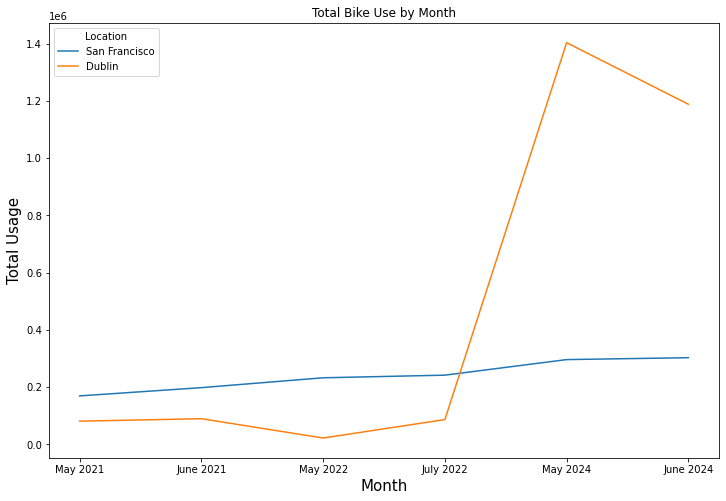

In [59]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthYearData, x="MonthYear", y="Value", hue="Location")
plt.title('Total Bike Use by Month')
plt.xlabel('Month', size=15)
plt.ylabel('Total Usage', size=15)
plt.show()

In [60]:
#Median mean and variance printed to screen
median(monthYearData["Value"])
mean(monthYearData["Value"])
variance(monthYearData["Value"])

Median: 215723.0
Mean: 359636.25
Variance: 184514601755.1875


In [61]:
#Above Average Values has been created and values below the average are labeled as 0 and those above the average are labeled as 1
monthYearData["Above Average Values"] = 0
for i in range(12):
    if monthYearData["Value"][i] > np.mean(monthYearData["Value"]):
        monthYearData["Above Average Values"][i] = "1"
    else:
        monthYearData["Above Average Values"][i] = "0"
        
monthYearData

,Location,Month,Value,Year,MonthYear,Above Average Values
0,San Francisco,May,169642,2021,May 2021,0
1,Dublin,May,81349,2021,May 2021,0
2,San Francisco,June,198493,2021,June 2021,0
3,Dublin,June,90023,2021,June 2021,0
4,San Francisco,May,232953,2022,May 2022,0
5,Dublin,May,22471,2022,May 2022,0
6,San Francisco,July,242102,2022,July 2022,0
7,Dublin,July,86923,2022,July 2022,0
8,San Francisco,May,296466,2024,May 2024,0
9,Dublin,May,1403543,2024,May 2024,1


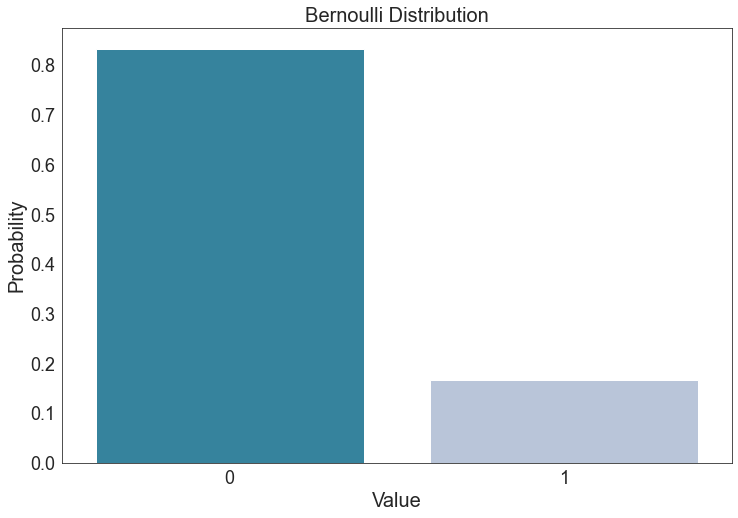

In [62]:
#Bernoulli distribution
sns.set_style("white")
fig,ax=plt.subplots(figsize=(12,8))
probabilities=monthYearData["Above Average Values"].value_counts(normalize=True)
ax=sns.barplot(x=probabilities.index, y=probabilities.values, palette="PuBuGn_r")
patches=ax.patches
label_graph(18,"Value","Probability","Bernoulli Distribution", 20)

[0.01940841 0.09057258]


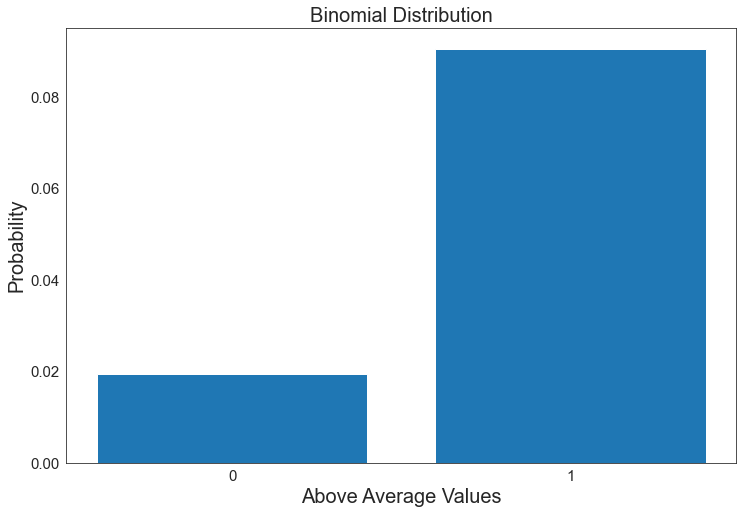

In [63]:
#Binomial distribution
aboveAvarageValues=monthYearData[monthYearData["Above Average Values"]== 1]
aboveAvarageValues["Value"].value_counts(normalize=True)
n=12
p=0.28
x=np.arange(0,2)
fig,ax=plt.subplots(figsize=(12,8))
pmf=stats.binom.pmf(x,n,p)
pps=plt.bar(x,pmf)
print(pmf)
plt.locator_params(integer=True)
label_graph(15,"Above Average Values", "Probability", "Binomial Distribution",20)

----------

In [64]:
monthYearData = monthYearData.drop(columns='Above Average Values')

In [65]:
monthYearData.dtypes

Location     object
Month        object
Value         int64
Year         object
MonthYear    object
dtype: object

In [66]:
#Label encoder was applied to the selected columns
columnLabelEncode = ["Location", "Month", "Year", "MonthYear"]
labelEncoder = LabelEncoder()
for column in columnLabelEncode:
    monthYearData[column] = labelEncoder.fit_transform(monthYearData[column])

In [67]:
monthYearData.dtypes

Location     int32
Month        int32
Value        int64
Year         int32
MonthYear    int32
dtype: object

In [68]:
#After the label encoder was made, the describe function was applied to the dataframe
monthYearData.describe()

,Location,Month,Value,Year,MonthYear
count,12.000000,12.000000,1.200000e+01,12.000000,12.000000
mean,0.500000,1.333333,3.596362e+05,1.000000,2.500000
std,0.522233,0.778499,4.486520e+05,0.852803,1.783765
min,0.000000,0.000000,2.247100e+04,0.000000,0.000000
25%,0.000000,1.000000,8.924800e+04,0.000000,1.000000
50%,0.500000,1.500000,2.157230e+05,1.000000,2.500000
75%,1.000000,2.000000,2.981245e+05,2.000000,4.000000
max,1.000000,2.000000,1.403543e+06,2.000000,5.000000


In [69]:
#For processing the columns were divided into x and y
X = monthYearData.drop("Location", axis = 1)
print(X)
y = monthYearData.Year.values.astype(int)
print(y)

    Month    Value  Year  MonthYear
0       2   169642     0          3
1       2    81349     0          3
2       1   198493     0          1
3       1    90023     0          1
4       2   232953     1          4
5       2    22471     1          4
6       0   242102     1          0
7       0    86923     1          0
8       2   296466     2          5
9       2  1403543     2          5
10      1   303100     2          2
11      1  1188570     2          2
[0 0 0 0 1 1 1 1 2 2 2 2]


In [70]:
#Each column was standardized and divided into two as train and test
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print(y_train.mean())
print(y_test.mean())

1.0
1.0


In [71]:
#SVC object created. C = 1 received. Model trained and prediction made
model = SVC(C = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
#Confusion matrix was used
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1, 0, 0],
       [0, 1, 1],
       [0, 0, 1]], dtype=int64)

In [73]:
#Accuracy, Precision Score, Recall Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, pos_label="positive", average="micro"))
print("Recall Score:",recall_score(y_test, y_pred, pos_label="positive", average="micro"))

Accuracy: 0.75
Precision Score: 0.75
Recall Score: 0.75


In [74]:
#Created a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
model = SVC(C = 1)

In [75]:
#Computed the cross-validation scores. Printed 5 accuracies obtained from the 5 folds
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = "accuracy") 
print(cv_results)
print("Mean Accuracy = {}".format(cv_results.mean()))

[1.  0.5 0.5 0.  1. ]
Mean Accuracy = 0.6


In [76]:
#Specified range of parameters (C) as a list and set up grid search scheme
params = {"C": [0.1, 1, 10, 100, 1000]}
model = SVC()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= "accuracy", cv = folds, verbose = 1, return_train_score=True)      

In [77]:
#Model trained and results printed on screen
model_cv.fit(X_train, y_train)  
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000991,0.000012,0.000208,0.000415,0.1,{'C': 0.1},1.0,0.5,0.0,0.0,...,0.3,0.400000,5,1.0,1.0,0.5,0.857143,0.428571,0.757143,0.245781
1,0.000398,0.000488,0.000605,0.000494,1,{'C': 1},1.0,0.5,0.5,0.0,...,0.6,0.374166,1,1.0,1.0,1.0,0.857143,1.000000,0.971429,0.057143
2,0.000199,0.000399,0.000862,0.000448,10,{'C': 10},1.0,0.5,0.5,0.0,...,0.6,0.374166,1,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000
3,0.000798,0.000399,0.000399,0.000489,100,{'C': 100},1.0,0.5,0.5,0.0,...,0.6,0.374166,1,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000
4,0.000598,0.000488,0.000399,0.000489,1000,{'C': 1000},1.0,0.5,0.5,0.0,...,0.6,0.374166,1,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000


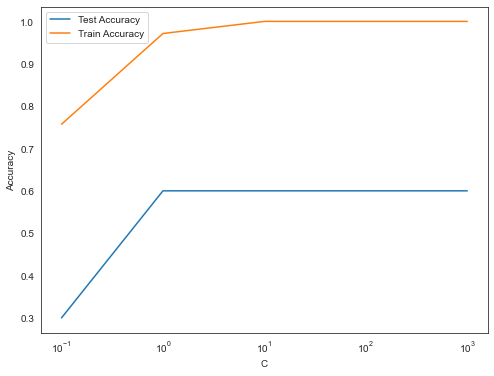

In [78]:
#Plot of C versus train and test scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results["param_C"], cv_results["mean_test_score"])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(["Test Accuracy", "Train Accuracy"], loc="upper left")
plt.xscale("log")

In [79]:
#The highest test accuracy printed on the screen
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.6 at C = 1


In [80]:
#The model with the best C value was trained and made predictions
model = SVC(C=best_C)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
#Accuracy, Precision Score, Recall Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, pos_label="positive", average="micro"))
print("Recall Score:",recall_score(y_test, y_pred, pos_label="positive", average="micro"))

Accuracy: 0.75
Precision Score: 0.75
Recall Score: 0.75


In [82]:
#Standard scaler object created.
scalar = StandardScaler()
scalar.fit(monthYearData)
scaled_data = scalar.transform(monthYearData)
scaled_data

array([[ 1.        ,  0.89442719, -0.4423083 , -1.22474487,  0.29277002],
       [-1.        ,  0.89442719, -0.64785519, -1.22474487,  0.29277002],
       [ 1.        , -0.4472136 , -0.37514291, -1.22474487, -0.87831007],
       [-1.        , -0.4472136 , -0.62766204, -1.22474487, -0.87831007],
       [ 1.        ,  0.89442719, -0.29491973,  0.        ,  0.87831007],
       [-1.        ,  0.89442719, -0.78492369,  0.        ,  0.87831007],
       [ 1.        , -1.78885438, -0.27362078,  0.        , -1.46385011],
       [-1.        , -1.78885438, -0.63487886,  0.        , -1.46385011],
       [ 1.        ,  0.89442719, -0.1470609 ,  1.22474487,  1.46385011],
       [-1.        ,  0.89442719,  2.43022417,  1.22474487,  1.46385011],
       [ 1.        , -0.4472136 , -0.13161689,  1.22474487, -0.29277002],
       [-1.        , -0.4472136 ,  1.92976512,  1.22474487, -0.29277002]])

In [83]:
#PCA = 2 received
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(12, 2)

Text(0, 0.5, 'Second Principal Component')

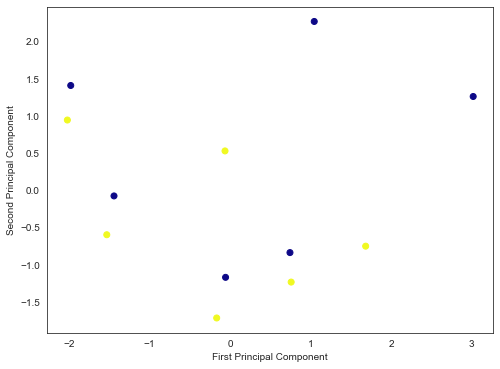

In [84]:
#Visualized with scatter
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = monthYearData["Location"], cmap ="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

[[0.00000000e+00 1.25000000e+00 7.01915000e+04 5.00000000e-01
  2.00000000e+00]
 [0.00000000e+00 1.50000000e+00 1.29605650e+06 2.00000000e+00
  3.50000000e+00]
 [1.00000000e+00 1.33333333e+00 2.40459333e+05 1.00000000e+00
  2.50000000e+00]]


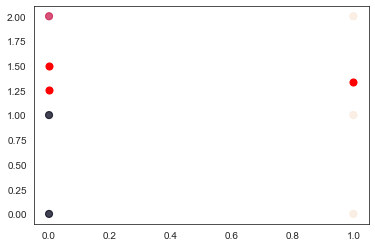

In [85]:
#K-means clustering created and visualized
kmeans = KMeans(n_clusters=3).fit(monthYearData)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(monthYearData["Location"], monthYearData["Year"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.show()

In [86]:
monthYearData

,Location,Month,Value,Year,MonthYear
0,1,2,169642,0,3
1,0,2,81349,0,3
2,1,1,198493,0,1
3,0,1,90023,0,1
4,1,2,232953,1,4
5,0,2,22471,1,4
6,1,0,242102,1,0
7,0,0,86923,1,0
8,1,2,296466,2,5
9,0,2,1403543,2,5


In [87]:
#The algorithms were enabled to predict the entered data 
x = monthYearData.iloc[:,[1,2,3,4]]
y = monthYearData.iloc[:,0]
X = x.values
Y = y.values
enterData = [1,303100,2,2] # ->1

In [88]:
#Data split for training and testing. It was later scaled
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test)

In [89]:
#Logistic Regression Classifier and Confusion Matrix
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test) 
cm = confusion_matrix(y_test,y_pred)
print("Logistic Regression Classifier")
print("Forecasting with data entry:",logr.predict([enterData]))
print(cm)
accuracyLOG = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyLOG)

Logistic Regression Classifier
Forecasting with data entry: [0]
[[1 0]
 [3 0]]
Accuracy:
0.25


In [90]:
#K-Nearest Neighbors Classifier (KNN) and Confusion Matrix
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("K-Nearest Neighbors Classifier")
print("Forecasting with data entry:",knn.predict([enterData]))
print(cm)
accuracyKNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyKNN)

K-Nearest Neighbors Classifier
Forecasting with data entry: [0]
[[1 0]
 [2 1]]
Accuracy:
0.5


In [91]:
#Support Vector Machine Classifier (SVC) and Confusion Matrix
svc = SVC(kernel="poly")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Support Vector Machine Classifier")
print("Forecasting with data entry:",svc.predict([enterData]))
print(cm)
accuracySVC = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracySVC)

Support Vector Machine Classifier
Forecasting with data entry: [0]
[[1 0]
 [3 0]]
Accuracy:
0.25


In [92]:
#Naive Bayes Classifier and Confusion Matrix
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Naive Bayes Classifier")
print("Forecasting with data entry:",gnb.predict([enterData]))
print(cm)
accuracyNB = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyNB)

Naive Bayes Classifier
Forecasting with data entry: [0]
[[1 0]
 [1 2]]
Accuracy:
0.75


In [93]:
#Decision Tree Classifier and Confusion Matrix
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier")
print("Forecasting with data entry:",dtc.predict([enterData]))
print(cm)
accuracyDT = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyDT)

Decision Tree Classifier
Forecasting with data entry: [0]
[[1 0]
 [0 3]]
Accuracy:
1.0


In [94]:
#Random Forest Classifier and Confusion Matrix
rfc = RandomForestClassifier(n_estimators=10, criterion = "entropy")
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier")
print("Forecasting with data entry:",rfc.predict([enterData]))
print(cm)
accuracyRF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyRF)

Random Forest Classifier
Forecasting with data entry: [0]
[[1 0]
 [2 1]]
Accuracy:
0.5
